## Chi-Squared Analysis

### First Question: Did more women and children survive compared to men?

#### Dataset from Canvas (Titanic_Passengers.csv)

In [7]:
import pandas as pd

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [8]:
passenger_df.tail()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.5
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.5
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN
1351,"WILDING, Mr Edward",NaN,NaN,NaN,Male,1,died,NaN,NaN


## What kind of data is the `dependent` variable?
    
- What kind of data is the `gender` (indep. variable)?
    - Nominal
    
Two Types:
    - `Ordinal` data. Data that can be ordered.
    
    - `Categorical/nominal`. Data that can not be order.

In [9]:
# margins = True will show the summary
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Gender'], margins=True)
print(contingency_table)

Gender      Female  Male   All
Lived_Died                    
died           143   709   852
lived          339   161   500
All            482   870  1352


Text(0, 0.5, 'Count')

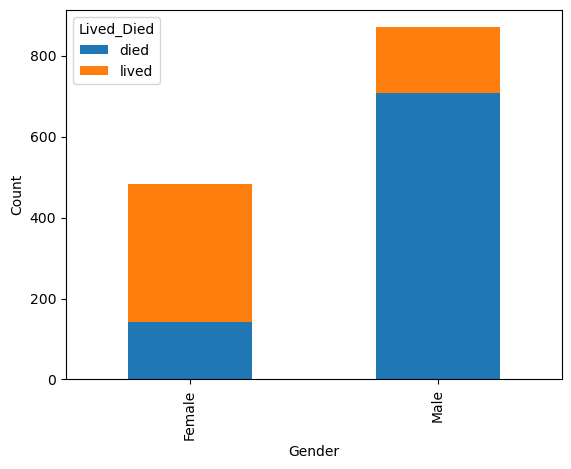

In [10]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')


In [11]:
from scipy import stats # for chi2_contigency

print(stats.chi2_contingency(contingency_table)[0:3])

# You get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statistic, the less likelihood that the observed values were the result of pure chance
# 2) Target p-value
# 3) Degrees of Freedom: 1 degree of freedom. (r rows -1) * (r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age relevant?

In [12]:
# Check the age column. It is already fixed for the age at the time of incident.

# What about null values?

# Create the bins
passenger_df['Age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

contingency_table = pd.crosstab(passenger_df['Age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')


Lived_Died  died  lived
Age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


<Axes: ylabel='Frequency'>

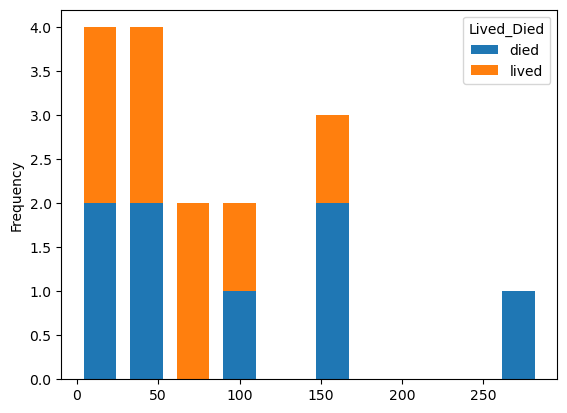

In [13]:
contingency_table = pd.crosstab(passenger_df['Age_bins'], passenger_df['Lived_Died'])
contingency_table.plot(kind='hist', stacked = True, rwidth=0.7)


<Axes: ylabel='Frequency'>

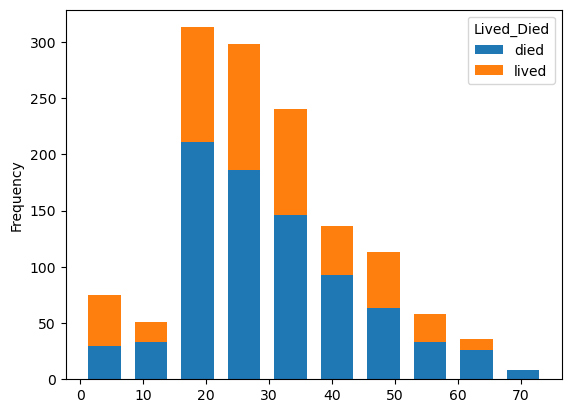

In [14]:
passenger_df.pivot(columns='Lived_Died')['Age'].plot(kind='hist', stacked=True, rwidth=0.7)

## Chi-Square Example 

In [15]:
# Create a heatmap
#Check the age columns, it is already fixed for the age of the time of incident?

# What about Null values?

# Create Bins
# passenger_df['Age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
passenger_df['Age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0, 90, 10))


contingency_table = pd.crosstab(passenger_df['Age_bins'], passenger_df['Lived_Died'])

print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')


# Use a pivot table 

Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


C:\Users\mmech\AppData\Local\Temp\ipykernel_20816\2348227581.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['Age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)


Text(0.5, 1.0, 'Histogram of Age Ranges')

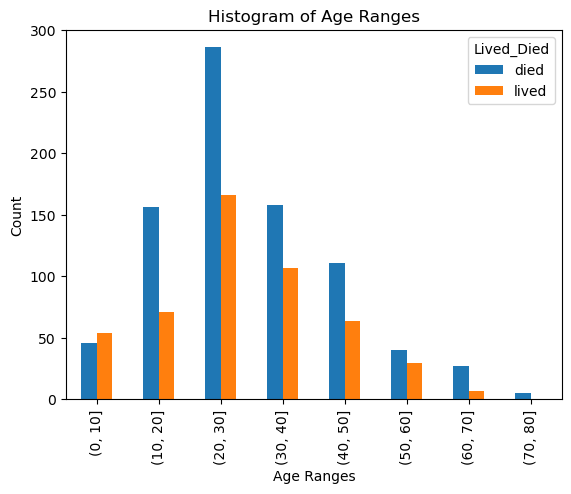

In [17]:
passenger_df.groupby(['Age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Histogram of Age Ranges')

C:\Users\mmech\AppData\Local\Temp\ipykernel_20816\173141088.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_bins'])
C:\Users\mmech\AppData\Local\Temp\ipykernel_20816\173141088.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-69'),
  Text(7.5, 0, '70-79')])

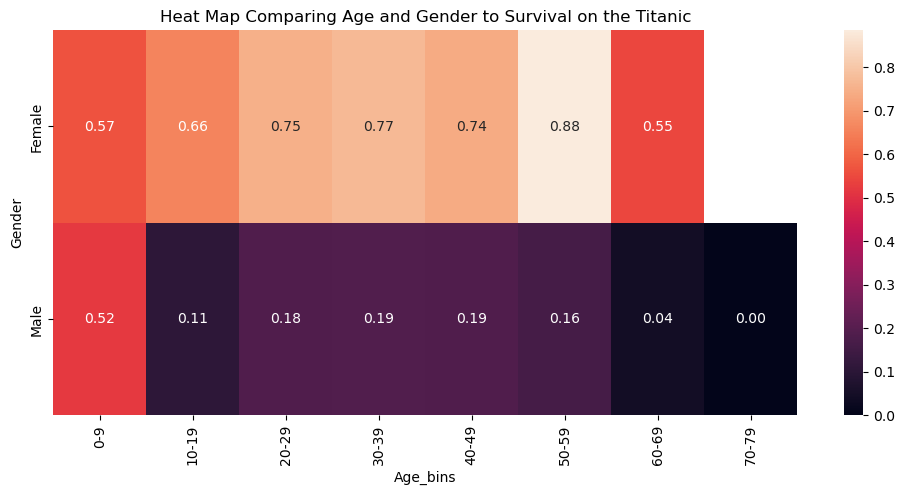

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import preprocessing

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

# Drop columns you do not need
passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
passenger_df.dropna(inplace=True) # Drop null values

# Encode the categorical data
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])

passenger_df['Age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0, 90, 10))

pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_bins'])
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap
# Create Heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heat Map Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

## TASK: Did the Titanic Passenger Class Affect Survivorship?

In this case, the data is `ordinal` because we can order the categories from first to third.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import preprocessing

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [35]:
# Create a Bar Plot with the data Stacked
passenger_df['Age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0, 90, 10))


contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
print(contingency_table)

print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')


Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181
Chi2-Stats (104.05195288933228, 2.543346399916496e-23, 2)


<Axes: xlabel='Passenger_Class'>

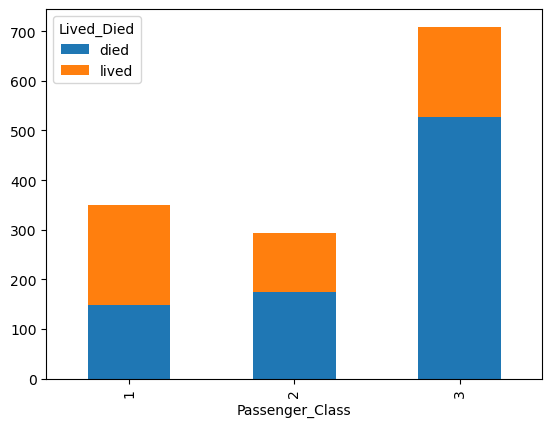

In [36]:
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])

pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Passenger_Class'])

contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
contingency_table.plot(kind='bar', stacked=True)

<Axes: xlabel='Lived_Died'>

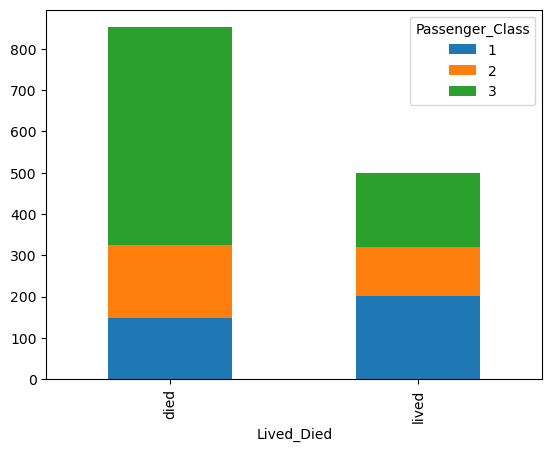

In [37]:
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=False)
contingency_table.plot(kind='bar', stacked=True)

Which passenger class is responsible for the significant difference in survival rate?
- Chi-Square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this is out first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a 'Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compare every passenger class to every other class to see if there is statistical significance between the two
- We could apply a `Chi-Square` test for each of the three separate comparison, but our sample data is too small
- In this case, `Fisher's Exact` Test is a better option

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import preprocessing

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [46]:
first_class = contingency_table.iloc[0].values # Extract row values 
second_class = contingency_table.iloc[1].values
third_class = contingency_table.iloc[2].values

# Create a Fisher's Exact test to determine if there is a relationship between passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact Test for First and Third Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([second_class, first_class])
print(f'Fishers Exact Test for Second and Third Class: {pvalue}')

Fishers Exact Test for First and Third Class: 7.457205699022123e-24
Fishers Exact Test for First and Second Class: 1.827149276703859e-05
Fishers Exact Test for Second and Third Class: 1.827149276703859e-05


Each of the Fisher's Tests reveals statistical significance

Another way to conceptualize the results is to look at percentages:

| Passenger Class    |  Died    |
|--------------------|----------|
| First Class        | 43% |
| Second Class       | 60% |
| Third Class        | 74% |

TODO: Create a heatmap of Passenger Class split in Age_Ranges by Gender and survival rate


### T-Test: Fare and Gender

While the `Chi-Test` and 'Fisher-Test` focus on `categorical` discrete dependent variable, the `T-Test` and the `ANOVA` test target `continuous` data

#### How was Fare (price of passage) Affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes?
- Is there an interaction between gender and passenger class on the resulting fare?

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import preprocessing

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

Text(0.5, 1.0, 'Amount of fare paid based on gender')

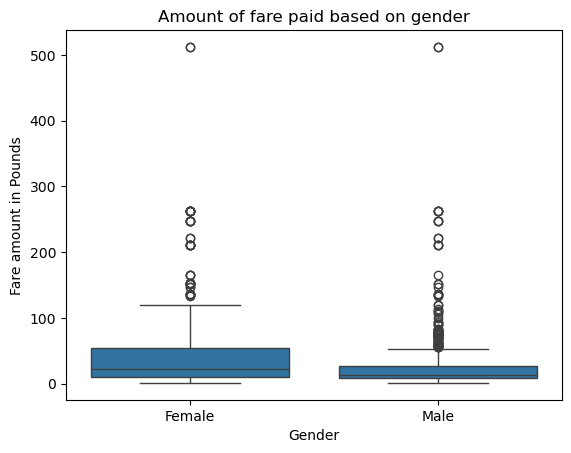

In [51]:
# Visualize data using box plot
sns.boxplot(y=passenger_df['Fare_decimal'], x=passenger_df['Gender'])
plt.ylabel('Fare amount in Pounds')
plt.title('Amount of Fare Paid Based on Gender')

In [52]:
male = passenger_df[passenger_df['Gender'] == 'Male']
print(f'Male Summary {male['Fare_decimal'].describe()}')

Male Summary count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [53]:
female = passenger_df[passenger_df['Gender'] == 'Female']
print(f'Female Summary {female['Fare_decimal'].describe()}')

Female Summary count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


In [55]:
from scipy.stats import ttest_ind

passenger_df.dropna(inplace=True)
male = passenger_df[passenger_df['Gender'] == 'Male']
female = passenger_df[passenger_df['Gender'] == 'Female']
# Run Test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare Paid p-value {pvalue}')

T-Test for Fare Paid p-value 6.093364811911871e-13


- `T-Test` specializes in comparing two populations
- ANOVA (Analysis of Variance) test will allow you to compare the influence of `three or more` populations

Fair prices are `continuous numerical dependent variable`. They are affected by the three passenger classes.

Install new package:

conda install statsmodels

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [60]:
# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

In [65]:
# Load your OLS (Ordinary Least Square) model
model = ols('Fare_decimal ~ C(Passenger_Class)', data=passenger_df).fit()
# ANOVA table
anova_table = sm.stats.anova_lm(model, type=1) # type = # is the anova table format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR (>F) is your P-value

#### ANOVA Notation (R)-style Formulas):
- The `~`char separates the left side from the right side
- The `+` char adds a new separated column to the design matrix
- The `:` char adds a new interaction column to the model matrix
- The `*` char signifies both individual columns are combined

The string `Fare_decimal ~ C(Passenger_Class)` translates to:
- Fare decimal variable is affected by the categorical variable `(C)` Passenger_Class

Text(0.5, 1.0, 'Amount of Fare Paid Based on Passenger Class')

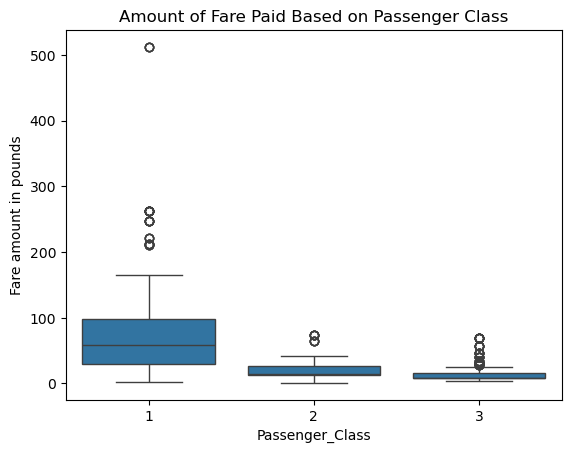

In [66]:
sns.boxplot(y=passenger_df['Fare_decimal'], x=passenger_df['Passenger_Class'])
plt.ylabel('Fare amount in pounds')
plt.title('Amount of Fare Paid Based on Passenger Class')

Do a `post-hoc` test on this. FOr ANOVA we use the `Tukey HSD` test to compare each individual population from a statistically significant ANOVA.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.drop(columns=['Born', 'Died', 'Fare', 'Lived_Died', 'Name', 'Gender'], inplace=True) # Drop unused columns
passenger_df.dropna(inplace=True) # Drop all NULLS


In [69]:
mc = MultiComparison(passenger_df['Fare_decimal'], passenger_df['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statistical significance is found, then the `reject` column will indicate `False`, that is, the `null-hypothesis` cannot be rejected.